# Desigualdade CHSH-Bell

Consideramos o seguinte observável
$$O = A_{1}(B_{1} + B_{2}) + A_{2}(B_{1} - B_{2}),$$
com
$$A_{j},B_{k}=\pm 1,$$
cujo valor médio é
\begin{equation}
\langle O\rangle_{dl} = \int d\lambda\rho(\lambda) \left\{a_{1}(\lambda)[b_{1}(\lambda) + b_{2}(\lambda)] + a_{2}(\lambda)[b_{1}(\lambda) - b_{2}(\lambda)]\right\}.
\end{equation}
Determinismo: e.g. $a_{j}=a_{j}(\lambda)$, Localidade: e.g. $a_{j}\ne a_{j}(\lambda,b_{k})$.

Valores de $O$: $\pm2$. __Determinismo e localidade__ implicam na desigualdade CHSH: $$-2 \le \langle O\rangle_{dl} \le 2.$$

#### Cálculo usando Mecânica Quântica
Observáveis
$$A_{1}=Z,\ A_{2}=X,\ B_{1}=2^{-1/2}(Z+X),\ B_{2}=2^{-1/2}(Z-X).$$
Pode-se verificar que nesse caso
\begin{equation}
O=\sqrt{2}\big(Z\otimes Z+X\otimes X\big).
\end{equation}
Para a preparação $$|\Psi_{-}\rangle = (|01\rangle-|10\rangle)/\sqrt{2},$$ usando
$Z|0\rangle=|0\rangle,\ Z|1\rangle=-|1\rangle,$ teremos que
\begin{align}
Z\otimes Z|\Psi_{-}\rangle_{AB} & = 2^{-1/2}\left(|0\rangle_{A}\otimes(-|1\rangle_{B}) - (-|1\rangle_{A})\otimes|0\rangle_{B}\right) =-|\Psi_{-}\rangle_{AB}.
\end{align}
De
$X|0\rangle=|1\rangle,\ X|1\rangle=|0\rangle$
temos
$$X\otimes X|\Psi_{-}\rangle_{AB}=-|\Psi_{-}\rangle_{AB}.$$
Assim
\begin{align}
\langle O\rangle_{mq} & = \langle\Psi_{-}|O|\Psi_{-}\rangle = \langle\Psi_{-}|\sqrt{2}(-2|\Psi_{-}\rangle) = -2\sqrt{2}.
\end{align}

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit_aer
!pip install matplotlib
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 13.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━

In [2]:
import numpy as np
import math
from qiskit import QuantumCircuit

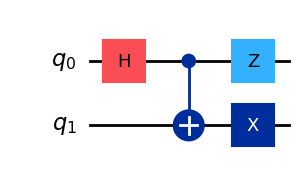

In [3]:
# cria o circuito quântico para preparar o estado de Bell |Psi->

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.z(0)
qc.x(1)

qc.draw('mpl')

In [4]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
XX = Pauli('XX')

observables = [ZZ,XX]

In [5]:
from qiskit_aer.primitives import Estimator
estimator = Estimator()

## Simulação

In [6]:
job = estimator.run([qc]*len(observables), observables)

In [7]:
values = job.result().values
values

array([-1., -1.])

In [8]:
O_avg_sim = math.sqrt(2)*(values[0]+values[1])
O_avg_sim

-2.8284271247461903

## Experimento

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="7e2a21a60011e3d36a6a74d8d42821f952cfd73a9e6b03b8e85e5c16d2d171fe49a61a3d5e0cee346a1e90a1fb4d825f5215ad30821914da1a3f45a1c2082e2f")
backend = service.backend(name="ibm_brisbane")

In [10]:
# Otimiza o circuito quântico para o backend definido acima.
# Ao otimizar, os índices dos qubits são trocados pelo transpilador conforme for mais conveniente
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
qc_transpiled = pass_manager.run(qc)
# Adapta a lista de operadores para ser medida no circuito quântico transpilado/otimizado
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in observables]

In [11]:
# parece que o uso do EstimatorV2 simplifica as coisas
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions
options = EstimatorOptions()
options.resilience_level = 1
options.optimization_level = 0
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

In [12]:
estimator = Estimator(backend, options=options)
job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)

csyyed14t8hg00816ra0


In [ ]:
job_id = 'csyyed14t8hg00816ra0'
job = service.job(job_id)

In [ ]:
values = job.result()[0].data.evs
values

array([-1.00111732, -1.02681564])

In [ ]:
O_avg_exp = math.sqrt(2)*(values[0]+values[1])
O_avg_exp

-2.8679302968795173

## Comparação

\begin{align}
& |\langle O\rangle_{CHSH}| \le 2, \\
& |\langle O\rangle_{mq}| = 2\sqrt{2} \approx 2.82, \\
& |\langle O\rangle_{sim}| \approx 2.82, \\
& |\langle O\rangle_{exp}| \approx 2.86.
\end{align}

In [ ]:
2*math.sqrt(2)

2.8284271247461903

## Referências

1. N. Brunner, D. Cavalcanti, S. Pironio, V. Scarani, and S. Wehner, “Bell nonlocality,” Rev. Mod. Phys., vol. 86, no. 2, pp. 419-478, Apr. 2014, doi: 10.1103/RevModPhys.86.419.

1. A. Javadi-Abhari et al., “Quantum computing with Qiskit.” arXiv, May 14, 2024. doi: 10.48550/arXiv.2405.08810.

1. Derek Wang, Coding with Qiskit 1.x, https://youtube.com/playlist?list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&si=fVV8M_REENx6fcsa
